## 삼성 주식 EDA 포트폴리오

In [69]:
# 라이브러리  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind, pearsonr
import statsmodels.api as sm

# 경고메세지 제거
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 읽기

data = pd.read_csv('Samsung.csv')

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# 코로나 이후 기간으로 변경 
# 00년대 데이터부터 있으니까 오히려 코로나 이후의 급변하는 주가 흐름이 검정 결과에 주요한 영향을 미치지 못하는거 같음
# 한국에 첫 발병자가 나온 시점은 2020/01/20이기 때문에 20년도 1월 1일부터 데이터 분석 
data = data[data['Date']>='2020-01-01']

# 사용할 데이터만 남기기 
data = data.dropna(subset=['Date'])

print(data.head(5))

           Date     Open     High      Low    Close     Adj Close    Volume
5032 2020-01-02  55500.0  56000.0  55000.0  55200.0  51557.589844  12993228
5033 2020-01-03  56000.0  56600.0  54900.0  55500.0  51837.800781  15422255
5034 2020-01-06  54900.0  55600.0  54600.0  55500.0  51837.800781  10278951
5035 2020-01-07  55700.0  56400.0  55600.0  55800.0  52118.007813  10009778
5036 2020-01-08  56200.0  57400.0  55900.0  56800.0  53052.019531  23501171


In [3]:
# 결측값 확인 
print(data.isnull().sum())
print(data.isna().sum())

# 0인 데이터 확인 
zero = (data==0).sum().sum()
zero_loc = data[data==0].stack()

print(zero)
print(zero_loc)

# 월별 평균 거래량으로 거래량이 0인 날짜 변경

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
13
5077  Volume    0.0
5080  Volume    0.0
5544  Volume    0.0
5550  Volume    0.0
5551  Volume    0.0
5559  Volume    0.0
5560  Volume    0.0
5561  Volume    0.0
5564  Volume    0.0
5567  Volume    0.0
5570  Volume    0.0
5573  Volume    0.0
5575  Volume    0.0
dtype: object


In [4]:
# 연도-월 추출 
data["Year_Month"]= data['Date'].dt.to_period('M')

# 월별 평균 거래량 계산
monthly_AVG = data[data['Volume'] > 0].groupby('Year_Month')['Volume'].mean().reset_index()

# 월별 평균 거래량과 기존 데이터 병합  
data = pd.merge(data, monthly_AVG, on='Year_Month', suffixes=('', '_Monthly_Avg'))

# 거래량이 0인 날짜 평균으로 대체 
data['Volume'] = data.apply(lambda row: row['Volume_Monthly_Avg'] if row['Volume'] == 0 else row['Volume'], axis=1)

In [5]:
# 결측값 잘 변경되었는지 확인 
zero = (data==0).sum().sum()
zero_loc = data[data==0].stack()

print(zero)
print(zero_loc)


0
Series([], dtype: object)


In [9]:
# 병합해 놓은 월별 평균 거래량 , 년도-월별 컬럼 제거 
data.drop(columns=['Year_Month', 'Volume_Monthly_Avg'], inplace=True)

print(data.head(3))

        Date     Open     High      Low    Close     Adj Close      Volume
0 2020-01-02  55500.0  56000.0  55000.0  55200.0  51557.589844  12993228.0
1 2020-01-03  56000.0  56600.0  54900.0  55500.0  51837.800781  15422255.0
2 2020-01-06  54900.0  55600.0  54600.0  55500.0  51837.800781  10278951.0


- 시각화

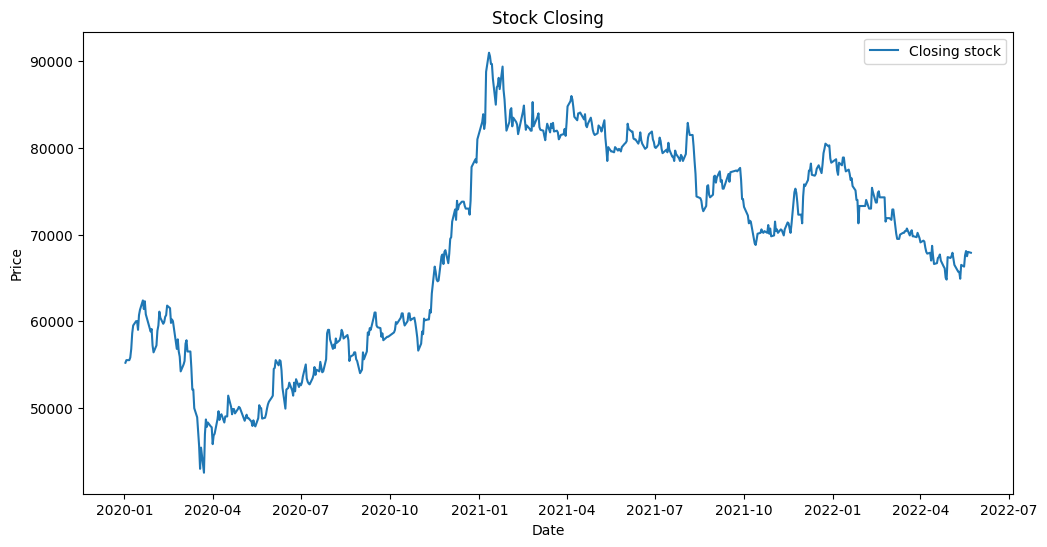

In [11]:
# 데이터 기한 변동으로 인한 시각화 재실행 

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Closing stock')
plt.title('Stock Closing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

- 2020년 1월 20일 국내 코로나 의심 환자 첫 발생, 43일 이후 전국에 확진자 5000명이 육박해 범유행하기 시작

- 코로나가 전국에 본격적으로 범유행하기 시작하는 시점인 2020년 3월 수치를 보면 삼성전자 주가가 폭락한 것을 확인할 수 있음 

- 2020년 4월 이후 점차 주가를 회복하는 모습을 볼 수 있는데, 이는 정부 및 시민들이 코로나 방역에 기민하게 대응했기 때문

- 2021년 코로나 전국 유행 후 1년 뒤 주가 약 90000으로 급상승 

- 이는, 마스크와 방역정책이 동반한 일상생활이 가능해졌으며 결정적으로 화이자에서 20년도 12월에 코로나 백신 최초 사용 허가가 되었기 때문

- 2021년, 코로나 바이러스 변이인 델타 바이러스 국내 첫 발생, 변종 코로나 유행 시작으로 인해 다시 주가 점점 하락

- 2021년 7월 7일 ~ 2022년 1월 29일, 4차 대유행 시기로 인한 다시 주가 하락

- 2022년 1월 오미크론 바이러스가 전국에 유행하면서 감염률은 상승하지만 사망률은 낮아지는 변종 바이러스 특정으로 마스크를 동반한 일상생활이 가능하게 되어 다시금 주가 상승

- 2022년 2월 이후로 국내에는 오미크론 바이러스 유행으로 인한 주가 하락세 


### 가설 설정 

1. 전일 주가 변동 폭은 다음날 주가 변동에 유의미한 영향을 미친다.

3. 매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다. 

<!-- 4. USD가 오르면 삼성 주가도 오를 것이다. -> USD 데이터가 적당한걸 찾으면 추가  -->

##### 가설 검증 
- 전일 주가 변동률은 다음날 주가 변동에 유의미한 영향을 미친다. 

상관관계 분석을 통해서 전일과 후일의 주가 변동률이 선형관계에 있는지 확인해 본 후 회귀 분석을 통해 인과관계 여부를 통해 가설 검정의 결과를 해석 

In [15]:
# 전일 마감 주가와 다음날 마감 주가 
data['Yesterday_Close'] = data['Close'].shift(1)
data['Tommorow_Close'] = data['Close'].shift(-1)

# 전일 주가 변동률과 다음날 주가 변동률 
data['Yesterday_Changing'] = (data['Close']-data['Yesterday_Close'])/data['Yesterday_Close']*100
data['Tommorrow_Changing'] = (data['Tommorow_Close']-data['Close'])/data['Close']*100

In [16]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,Tommorow_Close,Yesterday_Changing,Tommorrow_Changing
0,2020-01-02,55500.0,56000.0,55000.0,55200.0,51557.589844,12993228.0,NaN,55500.0,NaN,0.543478
1,2020-01-03,56000.0,56600.0,54900.0,55500.0,51837.800781,15422255.0,55200.0,55500.0,0.543478,0.000000
2,2020-01-06,54900.0,55600.0,54600.0,55500.0,51837.800781,10278951.0,55500.0,55800.0,0.000000,0.540541


In [46]:
#결측값 찾기 

print(data['Yesterday_Changing'].isnull())
print(data['Yesterday_Close'].isnull())


0       True
1      False
2      False
3      False
4      False
       ...  
584    False
585    False
586    False
587    False
588    False
Name: Yesterday_Changing, Length: 589, dtype: bool
0       True
1      False
2      False
3      False
4      False
       ...  
584    False
585    False
586    False
587    False
588    False
Name: Yesterday_Close, Length: 589, dtype: bool


In [48]:
print(data['Tommorow_Close'].isnull())
print(data['Tommorrow_Changing'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
584    False
585    False
586    False
587    False
588     True
Name: Tommorow_Close, Length: 589, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
584    False
585    False
586    False
587    False
588     True
Name: Tommorrow_Changing, Length: 589, dtype: bool


In [51]:
zero_close = (data==0).sum()
zero_changing = data[data==0].stack()

print(zero_close)
print(zero_changing)

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Yesterday_Close        0
Tommorow_Close         0
Yesterday_Changing    45
Tommorrow_Changing    45
dtype: int64
1    Tommorrow_Changing    0.0
2    Yesterday_Changing    0.0
7    Tommorrow_Changing    0.0
8    Yesterday_Changing    0.0
44   Tommorrow_Changing    0.0
                          ... 
543  Yesterday_Changing    0.0
548  Tommorrow_Changing    0.0
549  Yesterday_Changing    0.0
579  Tommorrow_Changing    0.0
580  Yesterday_Changing    0.0
Length: 90, dtype: object


In [53]:
# 전일 마감가, 다음날 마감가, 전일 주가 변동률, 다음날 주가 변동률
# 각자 NaN과 0인 결측값을 그 컬럼의 결측치를 제외한 평균값으로 변경 
# 월별 평균으로 할려 했으나 전반적으로 선형적인 수치를 원하기 때문에 전체 평균으로 변경

def replace_AVG(data):
    for col in data.columns:
        # 0 값 제외 평균 계산
        col_avg = data[data[col]!=0][col].mean()
        # NaN값 평균값 대체 
        data[col].fillna(col_avg, inplace=True)
        # 0값 평균값 대체
        data[col] = data[col].replace(0, col_avg)
    return data

data = replace_AVG(data)
print(data.head(3))

        Date     Open     High      Low    Close     Adj Close      Volume  \
0 2020-01-02  55500.0  56000.0  55000.0  55200.0  51557.589844  12993228.0   
1 2020-01-03  56000.0  56600.0  54900.0  55500.0  51837.800781  15422255.0   
2 2020-01-06  54900.0  55600.0  54600.0  55500.0  51837.800781  10278951.0   

   Yesterday_Close  Tommorow_Close  Yesterday_Changing  Tommorrow_Changing  
0     68623.129252         55500.0            0.053817            0.543478  
1     55200.000000         55500.0            0.543478            0.053817  
2     55500.000000         55800.0            0.053817            0.540541  


In [61]:
# 결측치 재확인 
# 전체 코드가 길어져서 확인만 한번씩 하기  

zero_close = (data==0).sum()
zero_changing = data[data==0].stack()

print(data.isnull().sum())
print(zero_close)
print(zero_changing)

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Yesterday_Close       0
Tommorow_Close        0
Yesterday_Changing    0
Tommorrow_Changing    0
dtype: int64
Series([], dtype: object)


In [67]:
# 피어슨 상관관계
psn_corr , psn_pval = pearsonr(data['Yesterday_Changing'], data['Tommorrow_Changing'])
print(f'pearsonr correlation statics : {psn_corr}')
print(f'pearsonr correlation p values : {psn_pval}')

pearsonr correlation statics : -0.004521598871362444
pearsonr correlation p values : 0.912803078175576


전일 주가변동과 다음날 주가변동의 상관관계를 확인하기 위해 피어슨 상관계수 확인

켄달 상관계수 : -0.0045

p값 : 0.9

이는 전일 주가 변동률과 다음날 주가 변동률은 상관관계가 매우 약하며 p 값의 유의수준 0.05 라는 가정하에 상관계수가 0 이라는 귀무가설을 기각할 수 없음  

회귀 분석을 추가로 분석하여 유의미한 영향을 미치는 예측 변수인지 확인

In [72]:
# 회귀분석 - 통계적 모델링
x = data['Yesterday_Changing']
y = data['Tommorrow_Changing']

x = sm.add_constant(x)

Regression_model = sm.OLS(y, x).fit()

print(Regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Tommorrow_Changing   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01200
Date:                Mon, 05 Aug 2024   Prob (F-statistic):              0.913
Time:                        23:24:08   Log-Likelihood:                -1150.3
No. Observations:                 589   AIC:                             2305.
Df Residuals:                     587   BIC:                             2313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0541      0

In [73]:
# 회귀분석 - 기계학습 및 데이터 마이닝 
x = data[['Yesterday_Changing']].values.reshape(-1,1)
y = data[['Tommorrow_Changing']].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f'mean squared error : {mse}')
print(f'r2 score : {r2}')

mean squared error : 3.8030715497250243
r2 score : -0.04258686908972931


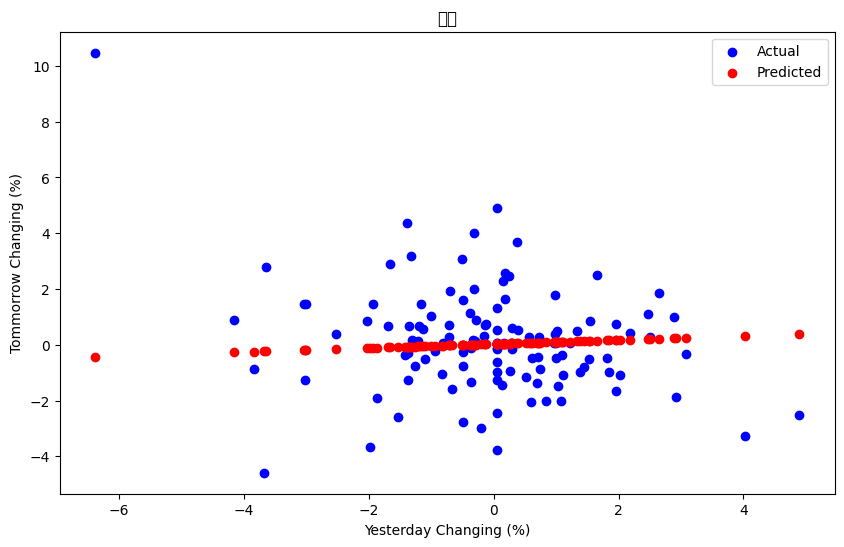

In [75]:
#실제값과 예측값 비교 

# plt.figure(figsize=(10,6))
# plt.scatter(x_test, y_test, color='blue' , label = 'Actual')
# plt.scatter(x_test, y_pred, color='red', label='Predicted')
# plt.xlabel('Yesterday Changing (%)')
# plt.ylabel('Tommorrow Changing (%)')
# plt.title('비교')
# plt.legend()
# plt.show()

# 통계 분석 해설 추가하기 

mean of squared error는 회귀 모델의 예측 오류를 나타내는 값

R2 스코어는 모델의 설명력을 나타내는 값 

회귀모델의 예측 오류를 나타내는 값이 약 3.66로 모델의 예측이 실제 값과 다름을 나타냄

r2 스코어는 약 -0.038로 매우 낮은 값으로 회귀 모델이 데이터를 잘 설명하지 못함을 나타냄 

시각화 결과 실제 모델의 분포는 예측 모델의 선형관계의 분포에 근접하지 못하다는 것을 다시 한번 확인할 수 있음 

- 결론 : 전날 주가 변동률이 다음날 주가 변동률을 예측하는데 유의미하지 않다는 것을 의미함 

##### 가설 검증 
-  매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다.

두 집단 간의 t-검정을 통해 통계적 차이를 검정 후 p value를 확인해 가설이 유의미한지 확인 후 결과해석

In [59]:
# 현재 데이터에 어떤 컬럼이 있는지 확인 
print(data.dtypes)

Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Adj Close                    float64
Volume                       float64
Yesterday_Close              float64
Tommorow_Close               float64
Yesterday_Changing           float64
Tommorrow_Changing           float64
dtype: object


In [60]:
# 분기 및 월별 마지막 데이터 추출 

data['Quarter'] = data['Date'].dt.to_period('Q')

data['Month'] = data['Date'].dt.to_period('M')

# 주간 주가 변동을 계산 

data['Weekly Changing'] = data['Close'].diff(5)

In [61]:
print(data['Weekly Changing'].head(5))

# 주간 변동 중 초반 데이터는 1주가 지나지 않았기 때문에 모두 NaN임 
# 결측값으로 보고 모두 0으로 변경  

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Weekly Changing, dtype: float64


In [62]:
data['Weekly Changing'].iloc[0:5]=0

In [63]:
# 결측값 처리
print(data['Weekly Changing'].head(5))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Weekly Changing, dtype: float64


In [64]:
# 분기 마지막 주 & 월별 마지막 주 데이터 프레임 새로 생성 

quarter_data = data[data['Date'].dt.is_quarter_end]


lastmon_week_data =  data[data.index.to_series().dt.is_month_end & ~data.index.to_series().dt.is_quarter_end]

quarter_data = quarter_data['Weekly Changing'].dropna()
lastmon_week_data = lastmon_week_data['Weekly Changing'].dropna()

In [65]:
print(quarter_data.head(5))
print(lastmon_week_data.head(5))

61      800.0
122    1400.0
307     400.0
370     600.0
432   -3300.0
Name: Weekly Changing, dtype: float64
19    -5900.0
145    3700.0
165   -2100.0
226    -800.0
329   -1300.0
Name: Weekly Changing, dtype: float64


###### 히스토그램과 Shapiro-Wilk 테스트를 이용하여 데이터가 정규분포를 따르는지 확인 
###### 데이터 양이 많아서 중심극한정리의 원칙으로 인해 정규분포를 유지한다고 가정하고 검정을 수행할수도 있지만, 통계적 분석으로만 가설검정을 수행하기 때문에 정규분포를 따르는지 따로 한번 더 수행

In [68]:
# t 검정
t_stat, t_p_value = ttest_ind(quarter_data, lastmon_week_data, equal_var=False)

print(f't test : {t_stat}')
print(f't p-value : {t_p_value}')

t test : 0.9885382904639712
t p-value : 0.3410867740407262
